# Basic 2-dimensional ODE solution

In [1]:
# This is a standard initalisation code - no need to change this
# It loads basic fast array code, plot library and ODE solver
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline
%config InlineBackend.figure_formats={'retina','png'}

## System definition

To solve the equations
$$
\begin{eqnarray*}
\frac{dx_1}{dt} &=& f_1(x_1, x_2)\\
\frac{dx_2}{dt} &=& f_2(x_1, x_2)
\end{eqnarray*}
$$
define the functions $f_{1,2}$ here.

**Note**, that the functions can explicitly depend on the free variable, to solve the *non-autonomous* equation $\dot{x_i}=f_i(t,x_1,x_2)$, but according to our convention this is no longer 2dim ODE, but 3dim ODE.

In [2]:
def f(t, X):
    x1 = X[0]
    x2 = X[1]
    return [ x1+math.exp(-x2),
             -x2 ]

## Basic analysis

Let us plot the direction field for the system.

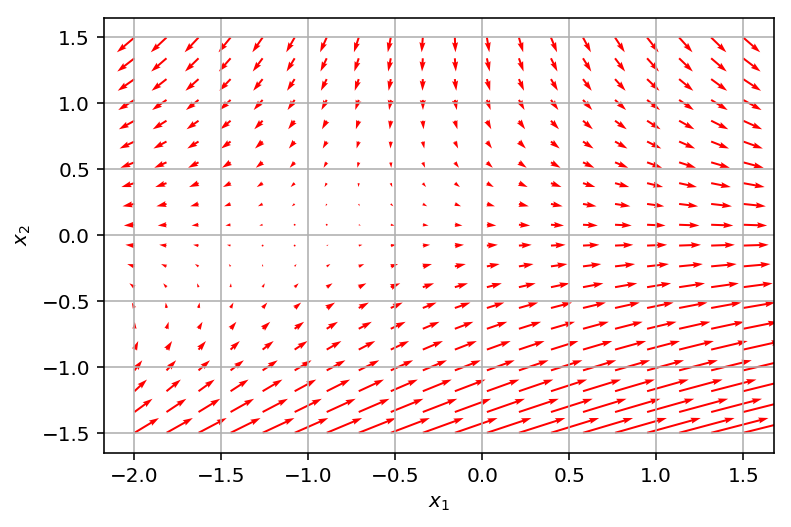

In [3]:
x1range = np.linspace(-2, 1.5, num=20)   # Select the required x_1 range
x2range = np.linspace(-1.5, 1.5, num=20) # Select the required x_2 range
t = 0

X1, X2 = np.meshgrid(x1range, x2range)
NI, NJ = X1.shape
u = np.zeros([NI, NJ])
v = np.zeros([NI, NJ])

for i in range(NI):
    for j in range(NJ):
        u[i,j], v[i,j] = f(t, [X1[i, j], X2[i, j]])

fig, ax = plt.subplots(1)

ax.quiver(X1, X2, u, v, color='r')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid()

## Simple solution

Let us just solve the equations for some initial conditions and plot the solution.

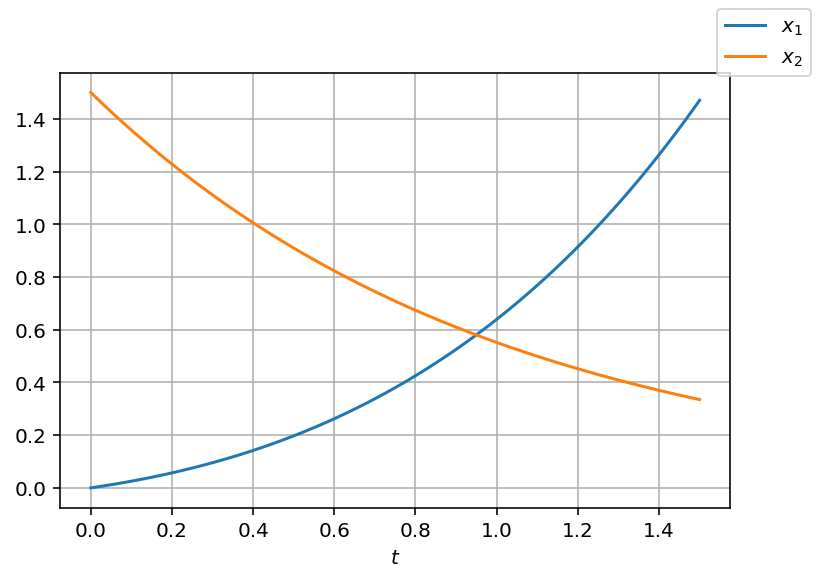

In [4]:
tspan = (0, 1.5) # time range for the solution
x0 = [0.0, 1.5]  # initial conditions

t_eval = np.linspace(tspan[0], tspan[1], num=100) # Make reported solution "smooth"
## Solve, and return solution at t_eval moments
xs = solve_ivp(f, tspan, x0, t_eval=t_eval)

fig2, ax2 = plt.subplots(1)

ax2.plot(xs.t, xs.y[0,:], label="$x_1$")
ax2.plot(xs.t, xs.y[1,:], label="$x_2$")
ax2.set_xlabel("$t$")
ax2.grid()
fig2.legend()

*Advanced programmers only:* For complicated situations there are many features of `solve_ivp` described in in [SciPy](https://www.scipy.org/) documentation [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html?highlight=solve_ivp#scipy.integrate.solve_ivp)

## Trajectories

Let us plot the trajectory for the same solution. Circle and box mark the initial and final points.

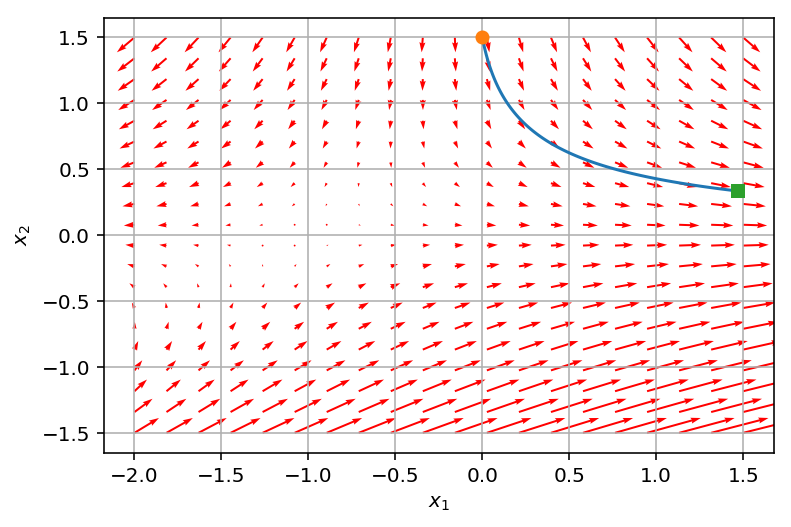

In [5]:
tspan = (0, 1.5)
x0 = [0.0, 1.5]

t_eval = np.linspace(tspan[0], tspan[1], num=100) # Make reported solution "smooth"
xs = solve_ivp(f, tspan, x0, t_eval=t_eval)

## Uncomment the following line if you do not want the direction field plot
# fig, ax = plt.subplots(1)

ax.plot(xs.y[0,:], xs.y[1,:])
ax.plot(xs.y[0,0], xs.y[1,0], 'o')
ax.plot(xs.y[0,-1], xs.y[1,-1], 's')
fig

Let us add one more trajectory.

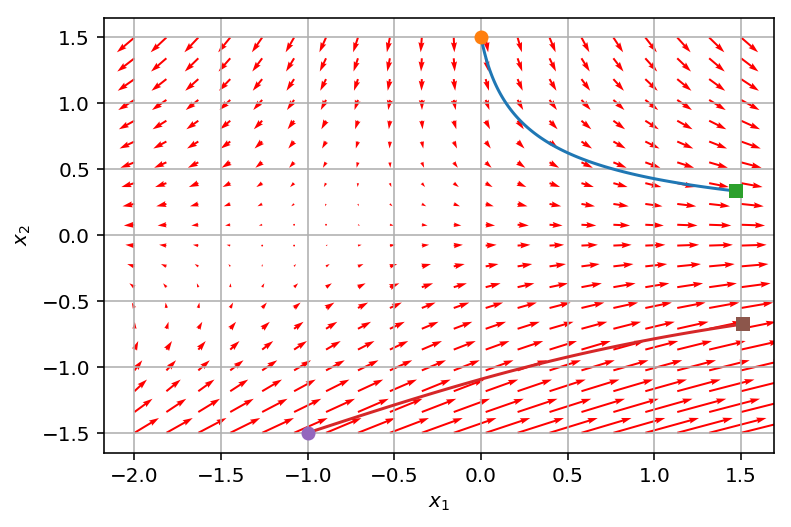

In [6]:
tspan = (0, 0.8)
x0 = [-1., -1.5]

t_eval = np.linspace(tspan[0], tspan[1], num=100) # Make reported solution "smooth"
xs = solve_ivp(f, tspan, x0, t_eval=t_eval)

ax.plot(xs.y[0,:], xs.y[1,:])
ax.plot(xs.y[0,0], xs.y[1,0], 'o')
ax.plot(xs.y[0,-1], xs.y[1,-1], 's')
fig

Let us plot several more at once

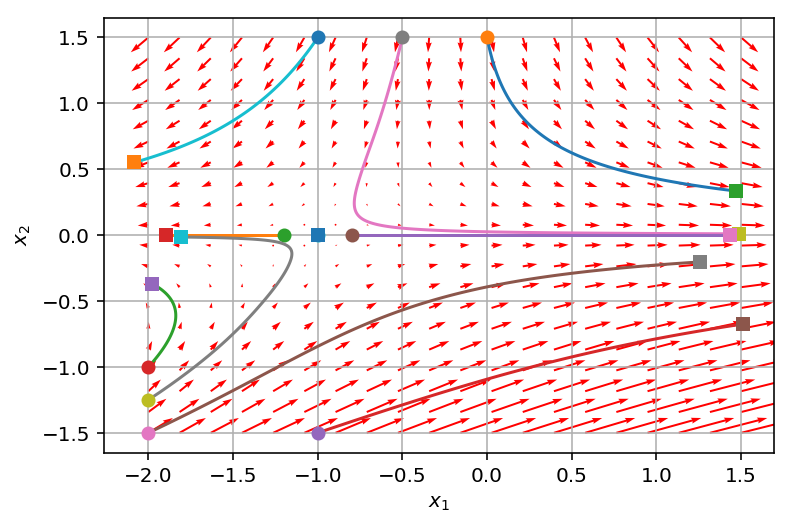

In [7]:
# Give a list of initial positions and integration times [x1,x2,tmax]
for x10,x20,tmax in [[-0.5,1.5,5], [-1,1.5,1], [-2,-1,1], [-2,-1.5,2],
                    [-1,0,1], [-1.2,0,1.5], [-0.8,0,2.5],
                    [-2,-1.25,4.5]]:
    tspan = (0, tmax)
    t_eval = np.linspace(tspan[0], tspan[1], num=100)
    t_eval = np.linspace(tspan[0], tspan[1], num=100)
    x0 = [x10, x20]
    xs = solve_ivp(f, tspan, x0, t_eval=t_eval)

    ax.plot(xs.y[0,:], xs.y[1,:])
    ax.plot(xs.y[0,0], xs.y[1,0], 'o')
    ax.plot(xs.y[0,-1], xs.y[1,-1], 's')

fig